In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)


Function for extraction of val_loss values from log file

In [46]:
def extract_loss_values(log_file_paths, csv_file_path):
    # Initialize lists to store data
    all_data = []

    # Iterate through each log file
    for log_file_path in log_file_paths:
        # Open the log file for reading
        with open(log_file_path, 'r') as log_file:
            lines = log_file.readlines()

        # Initialize lists for the current file
        iter_nums = []
        loss_vals = []

        # Iterate through lines and extract data
        for line in lines:
            if "iter_num=" in line and "loss_val=" in line:
                iter_num_index = line.find("iter_num=") + len("iter_num=")
                loss_val_index = line.find("loss_val=") + len("loss_val=")

                iter_num = int(line[iter_num_index:line.find(" ", iter_num_index)])
                loss_val = float(line[loss_val_index:line.find(" ", loss_val_index)])

                iter_nums.append(iter_num)
                loss_vals.append(loss_val)

        # Create a list of dictionaries for the current file
        data = [{'iter_num': iter_num, 'loss_val': loss_val} for iter_num, loss_val in zip(iter_nums, loss_vals)]

        # Extend the overall data list with the current file's data
        all_data.extend(data)

    # Write combined data to CSV file
    with open(csv_file_path, 'w', newline='') as csv_file:
        fieldnames = ['iter_num', 'loss_val']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        # Write the header
        writer.writeheader()

        # Write the combined data
        writer.writerows(all_data)


In [53]:
# Example usage with multiple log files
log_file_paths = ['output1.log', 'output2.log', 'output3.log', 'output4.log', 'output5.log', 'output6.log', 'output7.log', 'output8.log']
csv_file_path = 'combined_output_ds_mix.csv'

extract_loss_values(log_file_paths, csv_file_path)

# Example usage with multiple log files
log_file_paths = ['output1.log', 'output2.log', 
                  'output3.log', 'output4.log', 
                  'output5.log', 'output6.log', 
                  'output7.log', 'output8.log',
                  'output_ft1.log', 'output_ft2.log', 
                  'output_ft3.log', 'output_ft4.log', 
                  'output_ft5.log', 'output_ft6.log', 
                  'output_ft7.log', 'output_ft8.log', 'output_ft9.log']

csv_file_path = 'combined_output_ds_ft_VS.csv'

extract_loss_values(log_file_paths, csv_file_path)



Plot val_loss from log file

In [51]:
def plot_loss_val(input_csv_path, output_fig_path=None, width_line=1.5, window_size=100, dpi=150, figsize=(12, 10)):
    # Load CSV data into a pandas DataFrame
    df = pd.read_csv(input_csv_path)

    # Extract x and y columns from the DataFrame
    x = df['iter_num']
    y = df['loss_val']

    # Set DPI and figsize
    fig, axs = plt.subplots(2, 1, dpi=dpi, figsize=figsize)

    # Create a basic scatter plot with a log scale on the y-axis
    axs[0].plot(x/1000, y, linewidth=width_line, label='Loss_val')

    # Smooth the y-values using rolling mean
    y_smoothed = y.rolling(window=window_size).mean()

    # Plot the smoothed line in red
    axs[0].plot(x/1000, y_smoothed, linewidth=1, color='red', label=f'Smoothed (steps={window_size})')

    # Add labels and a title
    axs[0].set_xlabel('Steps  $(x10^3)$')
    axs[0].set_ylabel('Loss Value (log scale)')
    axs[0].set_title('Validation Loss over Steps')
    axs[0].grid()
    axs[0].legend()

    # Create a second plot with a log scale on both axes
    axs[1].plot(x/1000, y, linewidth=width_line, label='Loss_val')
    axs[1].plot(x/1000, y_smoothed, linewidth=1, color='red', label=f'Smoothed (steps={window_size})')
    axs[1].set_yscale('log')  # Set y-axis to log scale

    # Add labels and a title
    axs[1].set_xlabel('Steps  $(x10^3)$')
    axs[1].set_ylabel('Loss Value (log scale)')
    axs[1].set_title('Validation Loss over Steps (log-scale)')
    axs[1].grid()
    axs[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    if output_fig_path:
        fig.savefig(output_fig_path)
    else:
        plt.show()


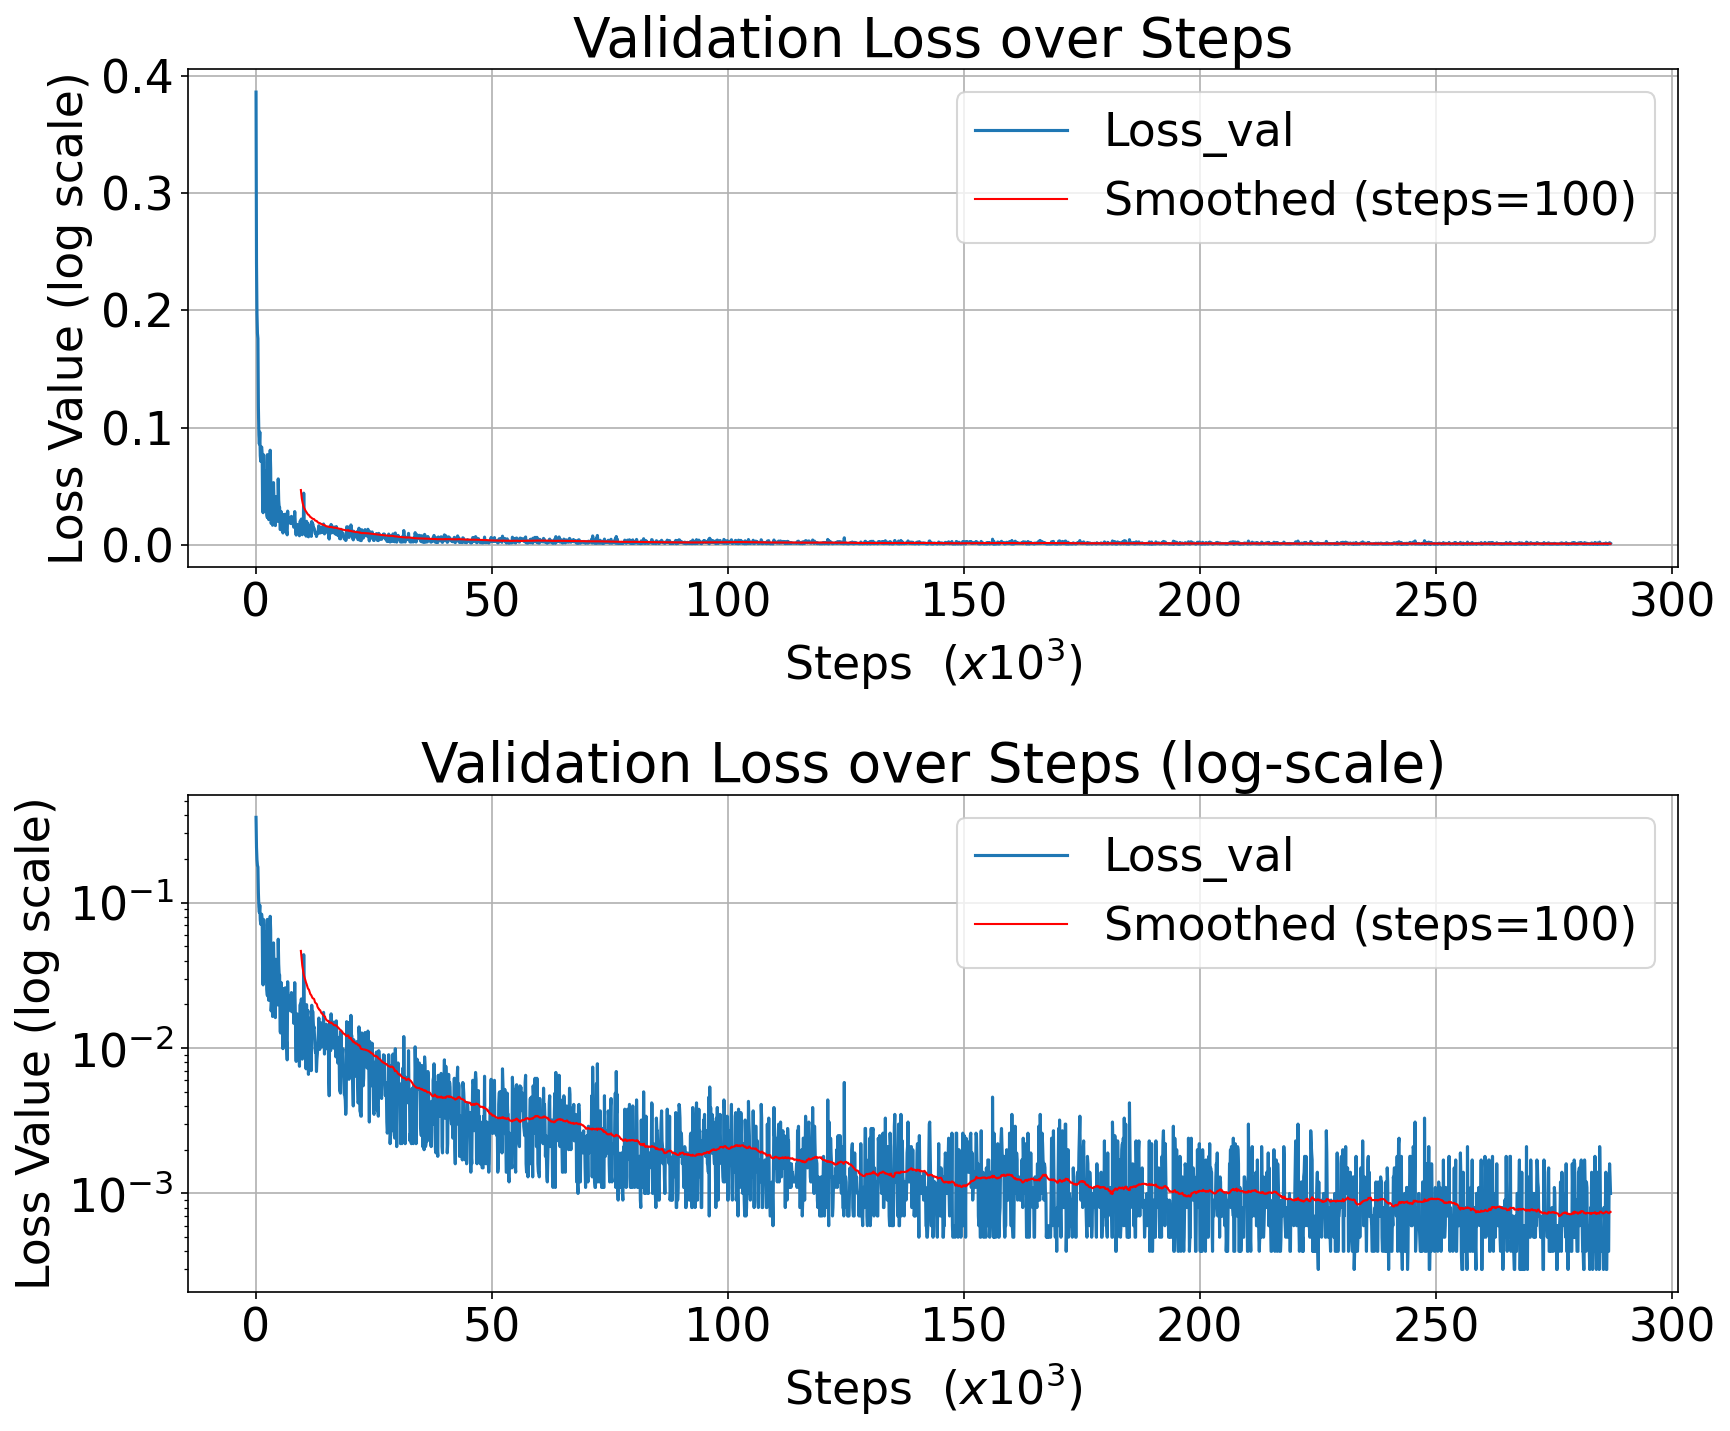

In [52]:
# Example usage
input_csv_path = 'combined_output_ds_mix.csv'
output_fig_path = 'loss_val_dataset_mix.png'
plot_loss_val(input_csv_path, output_fig_path=output_fig_path)


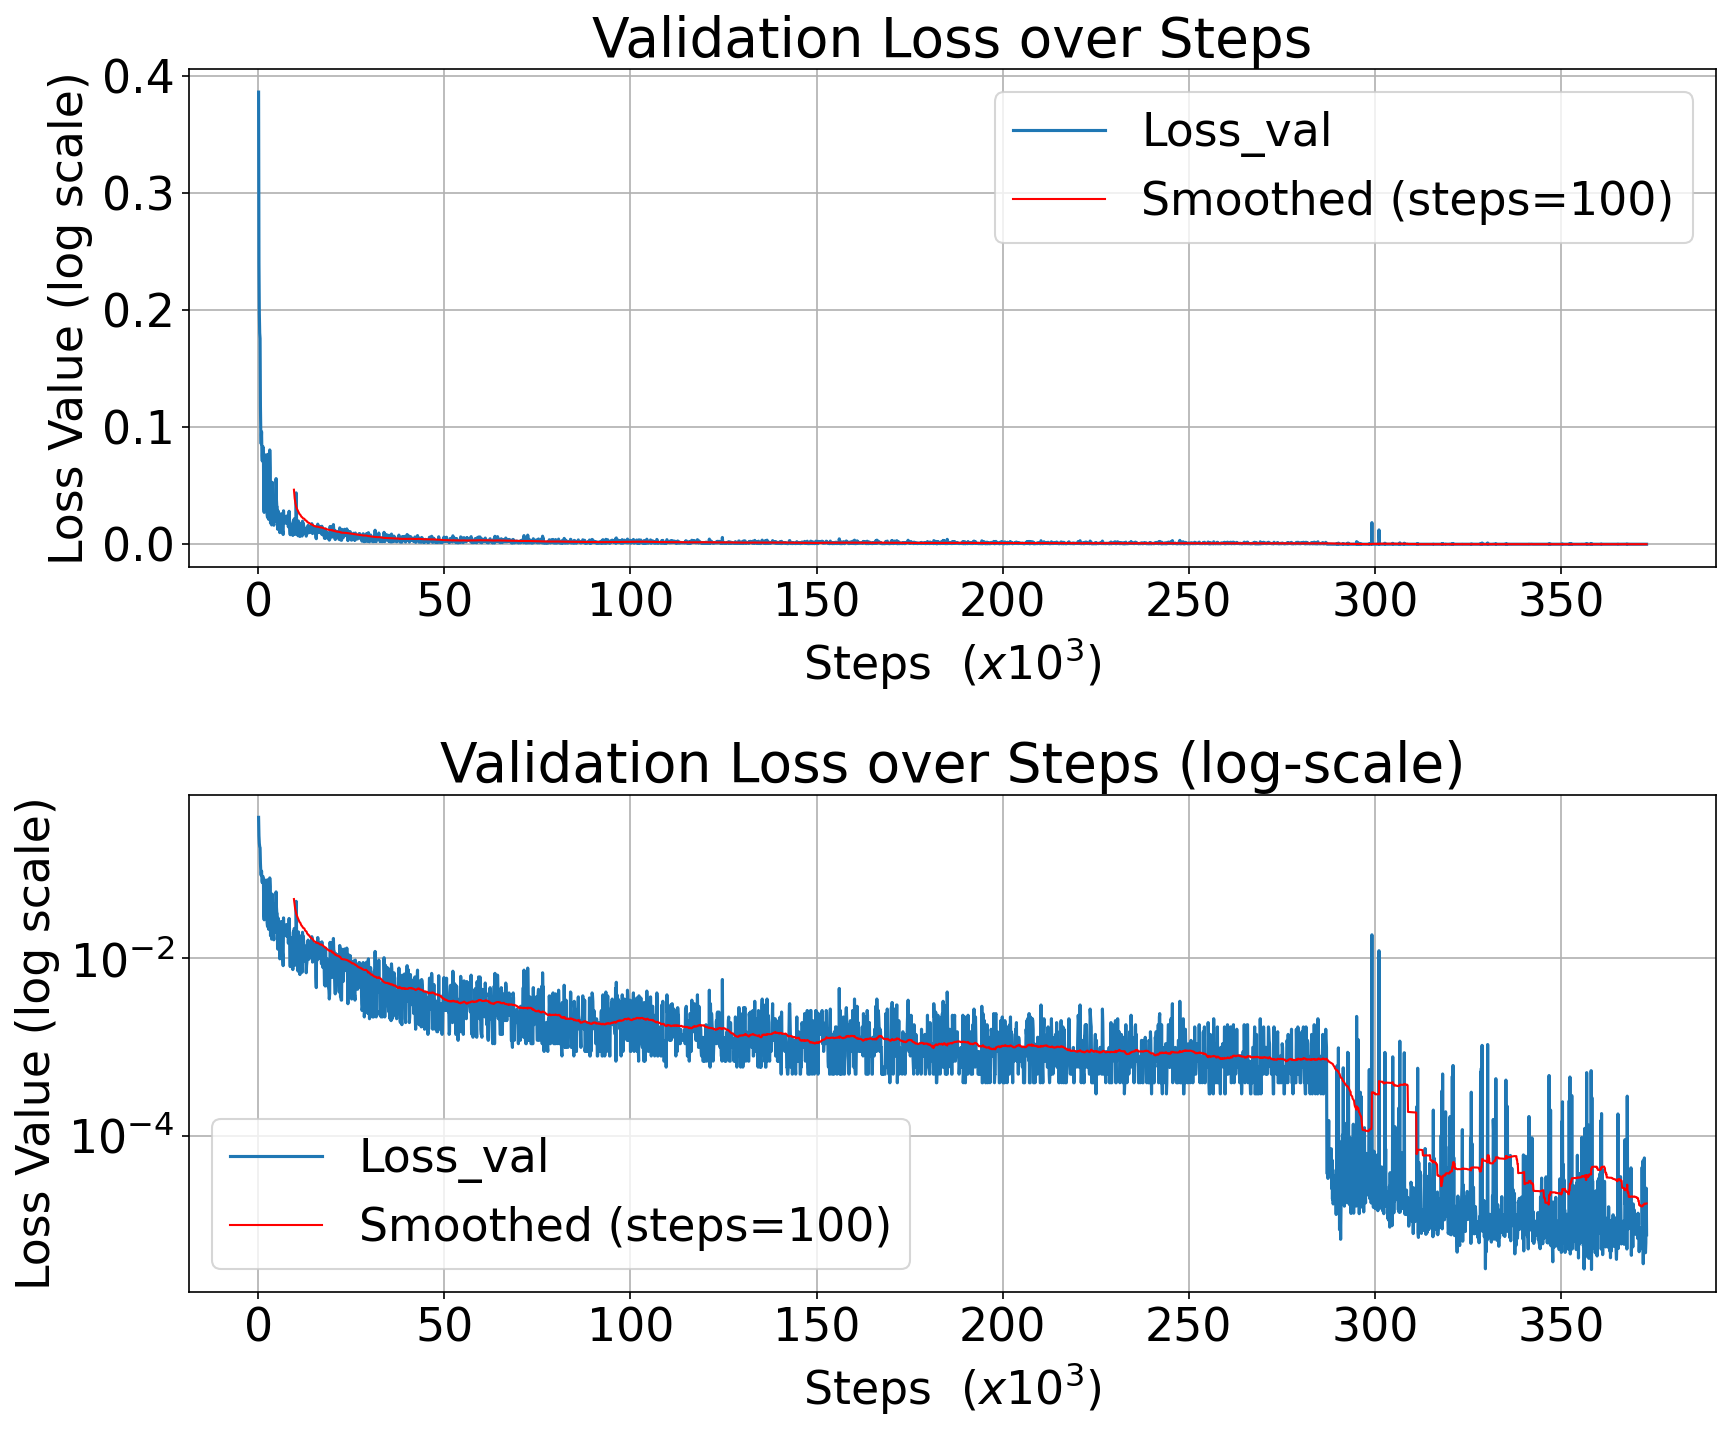

In [55]:
# Example usage
input_csv_path = 'combined_output_ds_ft_VS.csv'
output_fig_path = 'loss_val_dataset_FT.png'
plot_loss_val(input_csv_path, output_fig_path=output_fig_path)
